In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the random module.
import random

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3112f5b1e446d0fa106b183bf6050091


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3112f5b1e446d0fa106b183bf6050091&q=Boston


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | lobito
Processing Record 6 of Set 1 | moose factory
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | lamu
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | victoria
Processing Record 23 of Set 1 | ordynskoye
Processing Record 24 of 

Processing Record 38 of Set 4 | ibra
Processing Record 39 of Set 4 | taloqan
Processing Record 40 of Set 4 | mandalgovi
Processing Record 41 of Set 4 | emba
Processing Record 42 of Set 4 | saquena
Processing Record 43 of Set 4 | kenora
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | villa rica
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | kilemary
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | nizhnyaya omka
Processing Record 1 of Set 5 | atuona
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | port hawkesbury
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | paracuru
Processing Record 9 of Set 5 | vega de alatorre
Processing Record 10 of Set 5 | avarua
Processing Record 11 of Set 5 |

Processing Record 27 of Set 8 | bereda
Processing Record 28 of Set 8 | larap
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | soure
Processing Record 31 of Set 8 | grand-lahou
Processing Record 32 of Set 8 | kodiak
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | wittstock
Processing Record 35 of Set 8 | houma
Processing Record 36 of Set 8 | komyshuvakha
Processing Record 37 of Set 8 | ostroh
Processing Record 38 of Set 8 | ferrol
Processing Record 39 of Set 8 | mollendo
Processing Record 40 of Set 8 | ulaangom
Processing Record 41 of Set 8 | mount darwin
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | sindor
Processing Record 44 of Set 8 | dujuma
City not found. Skipping...
Processing Record 45 of Set 8 | honavar
Processing Record 46 of Set 8 | halifax
Processing Record 47 of Set 8 | mudhol
Processing Record 48 of Set 8 | calabozo
Processing Record 49 of Set 8 | qalyub
Processing Record 50 of Set 8 

Processing Record 18 of Set 12 | aklavik
Processing Record 19 of Set 12 | port hardy
Processing Record 20 of Set 12 | severo-yeniseyskiy
Processing Record 21 of Set 12 | marawi
Processing Record 22 of Set 12 | san jeronimo
Processing Record 23 of Set 12 | goba
Processing Record 24 of Set 12 | denpasar
Processing Record 25 of Set 12 | carnduff
Processing Record 26 of Set 12 | isiro
Processing Record 27 of Set 12 | pran buri
Processing Record 28 of Set 12 | port hueneme
Processing Record 29 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 12 | seoul
Processing Record 31 of Set 12 | musoma
Processing Record 32 of Set 12 | sept-iles
Processing Record 33 of Set 12 | cervo
Processing Record 34 of Set 12 | udachnyy
Processing Record 35 of Set 12 | puerto maldonado
Processing Record 36 of Set 12 | osakarovka
Processing Record 37 of Set 12 | upata
Processing Record 38 of Set 12 | luorong
Processing Record 39 of Set 12 | carutapera
Processing Record 40 of Set 12 | sup

In [24]:
len(city_data)

579

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.03,70,91,17.52,PF,2021-12-10 18:04:24
1,Saskylakh,71.9167,114.0833,-11.67,97,100,8.52,RU,2021-12-10 18:04:25
2,Port Elizabeth,-33.9180,25.5701,74.10,92,36,4.88,ZA,2021-12-10 18:00:16
3,Sao Joao Da Barra,-21.6403,-41.0511,84.29,73,12,12.12,BR,2021-12-10 18:04:25
4,Lobito,-12.3481,13.5456,78.85,81,7,6.44,AO,2021-12-10 18:04:26
5,Moose Factory,51.2585,-80.6094,24.78,74,75,14.97,CA,2021-12-10 18:04:26
6,Hasaki,35.7333,140.8333,36.00,72,20,9.46,JP,2021-12-10 18:04:26
7,Mataura,-46.1927,168.8643,55.47,94,99,1.70,NZ,2021-12-10 18:04:27
8,Barrow,71.2906,-156.7887,-2.18,84,90,5.75,US,2021-12-10 18:04:27
9,Jamestown,42.0970,-79.2353,51.39,70,1,9.22,US,2021-12-10 18:04:27


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

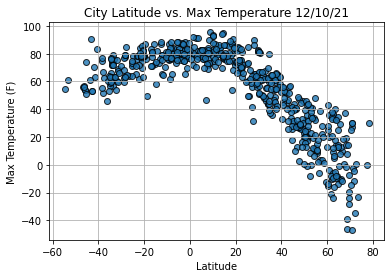

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


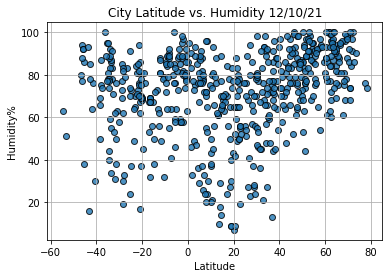

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity%")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


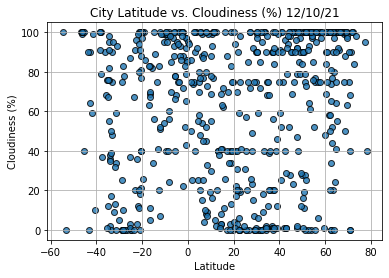

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

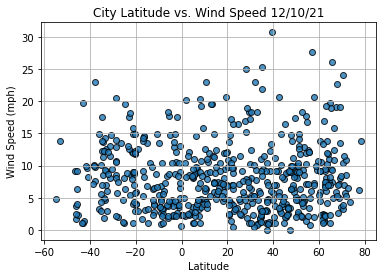

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Saskylakh,71.9167,114.0833,-11.67,97,100,8.52,RU,2021-12-10 18:04:25
5,Moose Factory,51.2585,-80.6094,24.78,74,75,14.97,CA,2021-12-10 18:04:26
6,Hasaki,35.7333,140.8333,36.00,72,20,9.46,JP,2021-12-10 18:04:26
8,Barrow,71.2906,-156.7887,-2.18,84,90,5.75,US,2021-12-10 18:04:27
9,Jamestown,42.0970,-79.2353,51.39,70,1,9.22,US,2021-12-10 18:04:27


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

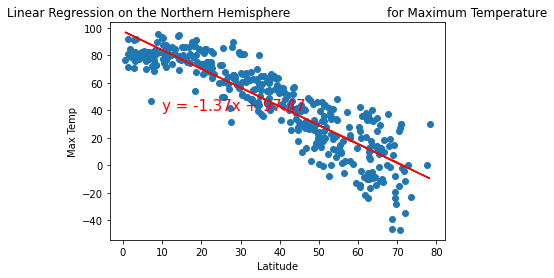

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

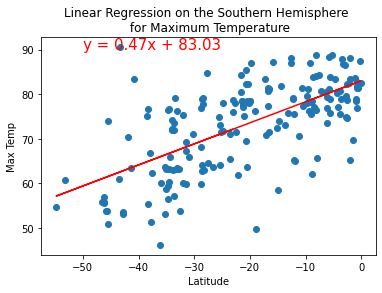

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90)) 

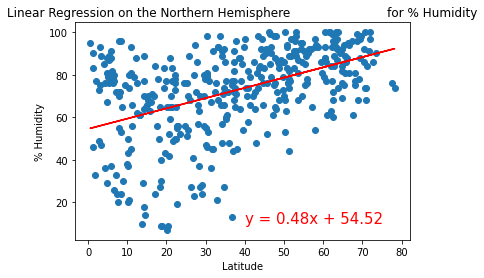

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

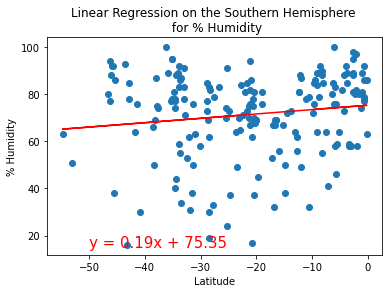

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

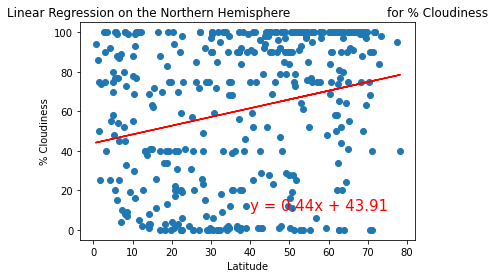

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

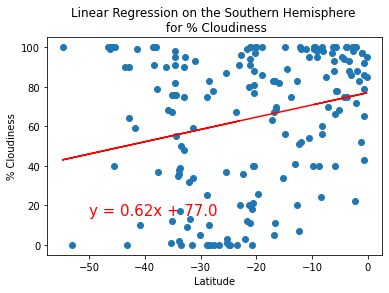

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

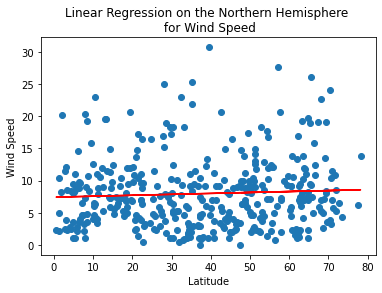

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

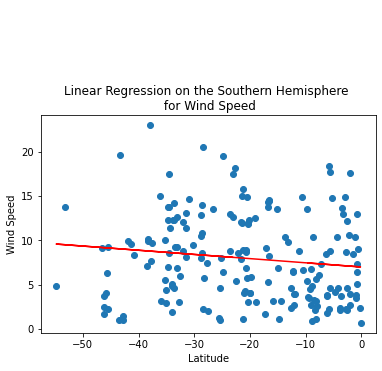

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))